<a href="https://www.kaggle.com/code/mosesmoncy/palmer-penguin-prediction?scriptVersionId=126870303" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Penguins are a family of 17 to 19 species of birds that live primarily in the Southern Hemisphere. They include the tiny blue penguins of Australia and New Zealand, the majestic emperor penguins of Antarctica and king penguins found on many sub- Antarctic islands, the endangered African penguin and the Galápagos penguin—the only penguin to be found north of the equator.

Model is created to predict the species of penguin whether it belong to Chinstrap, Gentoo or Adelie using Classification Models.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
a=pd.read_csv('/kaggle/input/penguin-size/penguins_size.csv')
a

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
# read first five data

a.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# read last five data

a.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [5]:
a.shape

(344, 7)

In [6]:
a.describe

<bound method NDFrame.describe of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     

In [7]:
a.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [8]:
a.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
# there are missing values for 'culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g'
# hence filling the missing values with mean()

a['culmen_length_mm']=a['culmen_length_mm'].fillna(a['culmen_length_mm'].mean())
a['culmen_depth_mm']=a['culmen_depth_mm'].fillna(a['culmen_depth_mm'].mean())
a['flipper_length_mm']=a['flipper_length_mm'].fillna(a['flipper_length_mm'].mean())
a['body_mass_g']=a['body_mass_g'].fillna(a['body_mass_g'].mean())

In [10]:
a.isna().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

<AxesSubplot:>

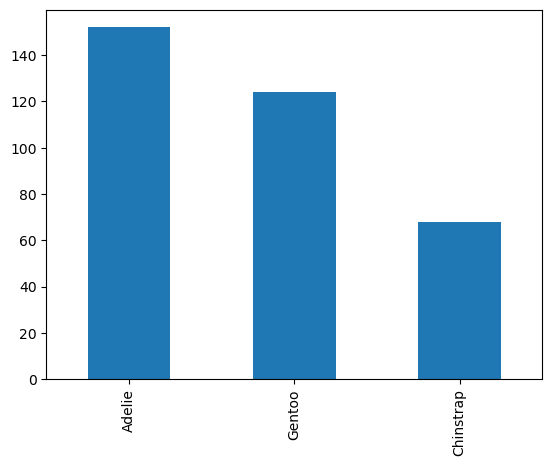

In [11]:
# plot a bar Chart for class

a['species'].value_counts().plot(kind='bar')

In [12]:
# using get_dummies encoding technique for 

from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
cols=['species','island','sex']

a[cols]=a[cols].apply(la.fit_transform)

In [13]:
a.dtypes

species                int64
island                 int64
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
dtype: object

<AxesSubplot:xlabel='sex', ylabel='count'>

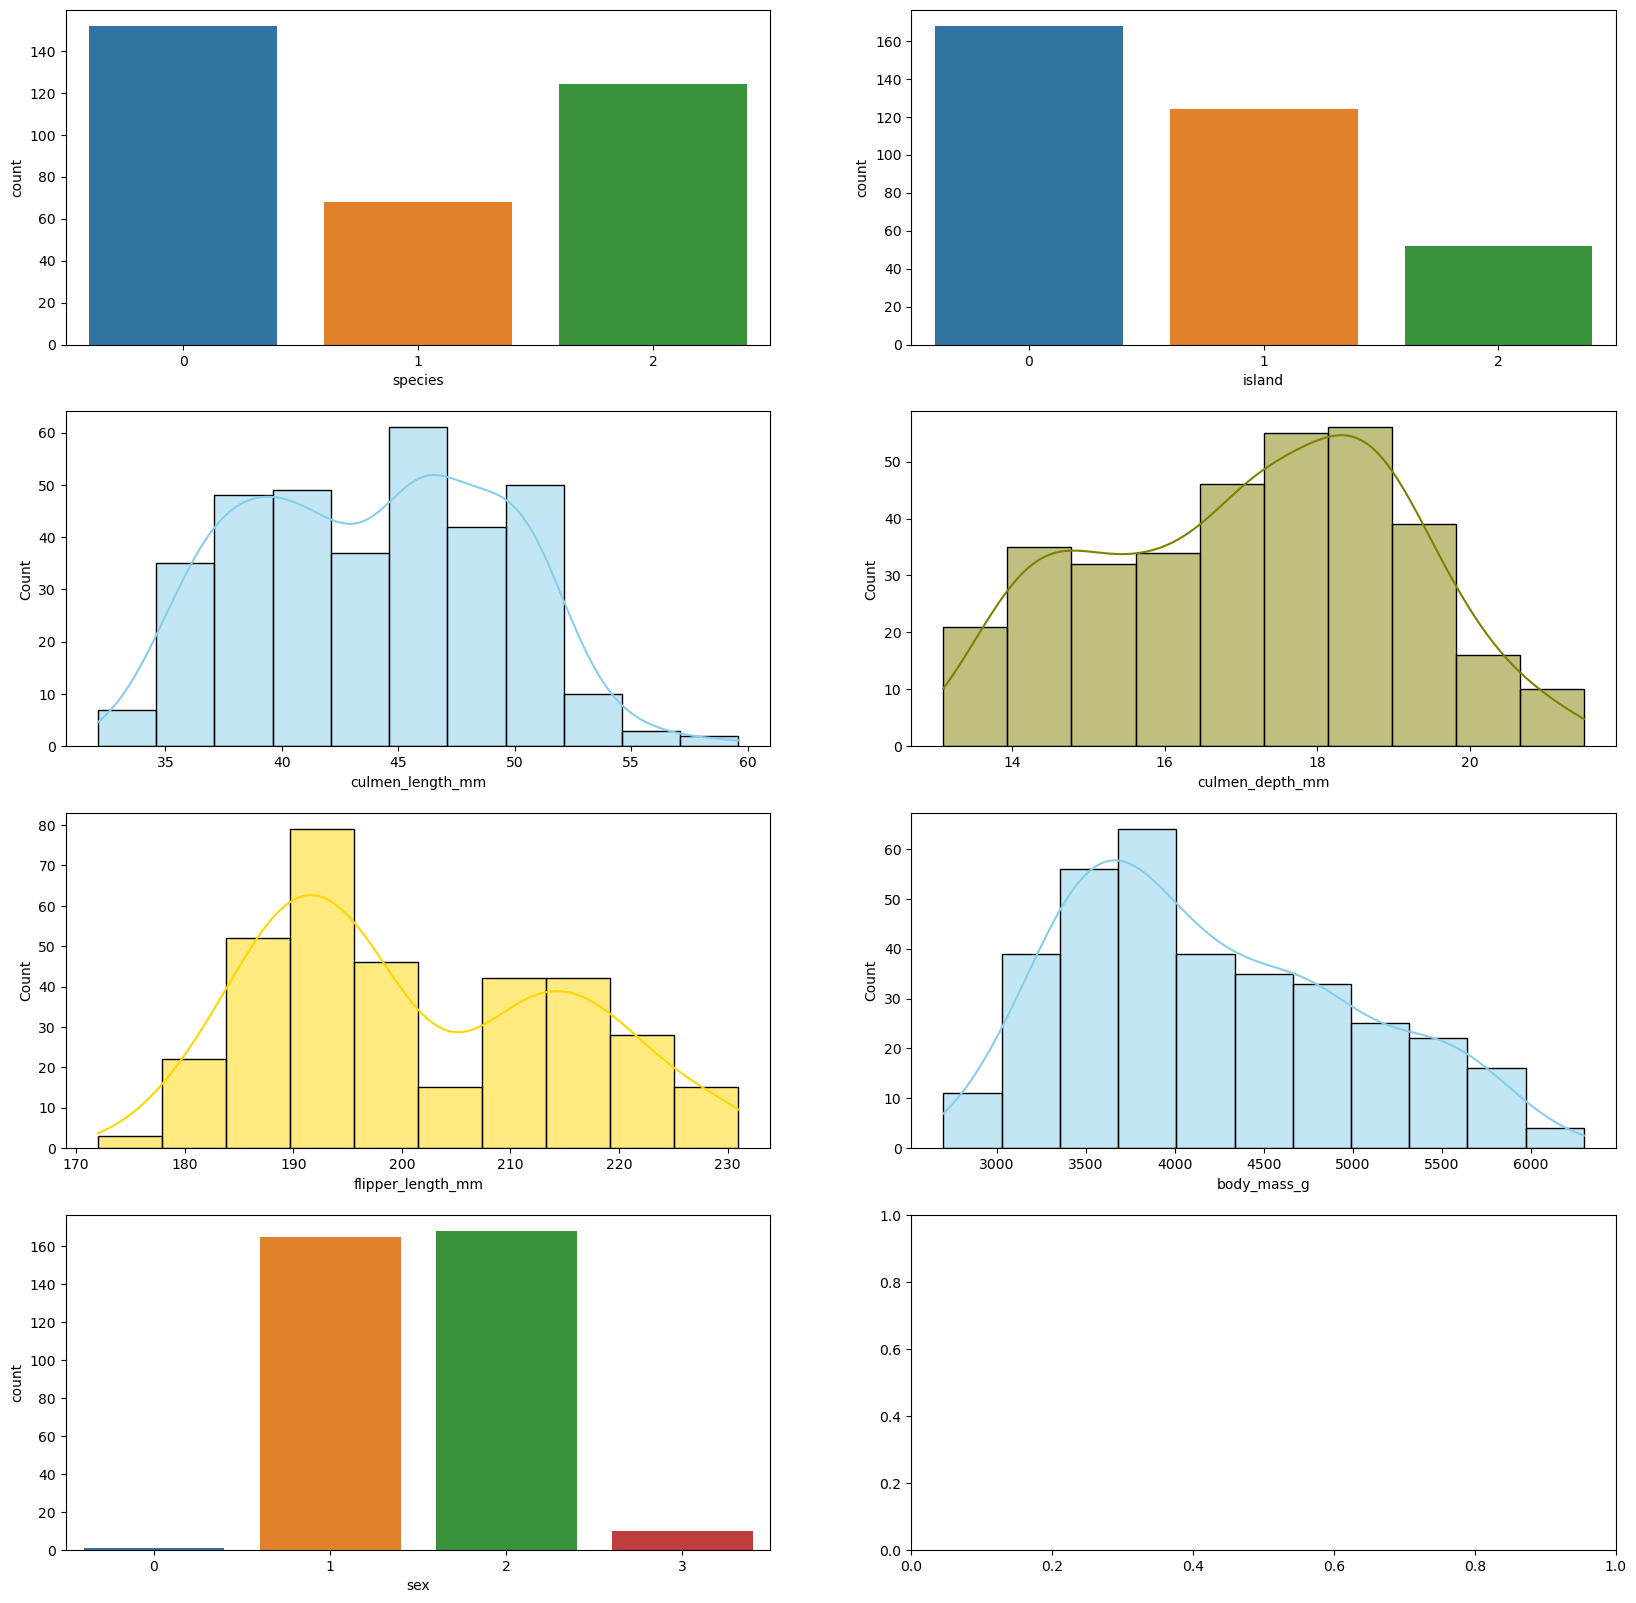

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
sns.countplot(x=a["species"], ax=axs[0, 0])
sns.countplot(x=a["island"], ax=axs[0, 1])
sns.histplot(data=a["culmen_length_mm"], kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=a["culmen_depth_mm"], kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=a["flipper_length_mm"], kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=a["body_mass_g"], kde=True, color="skyblue", ax=axs[2, 1])
sns.countplot(x=a["sex"], ax=axs[3, 0])


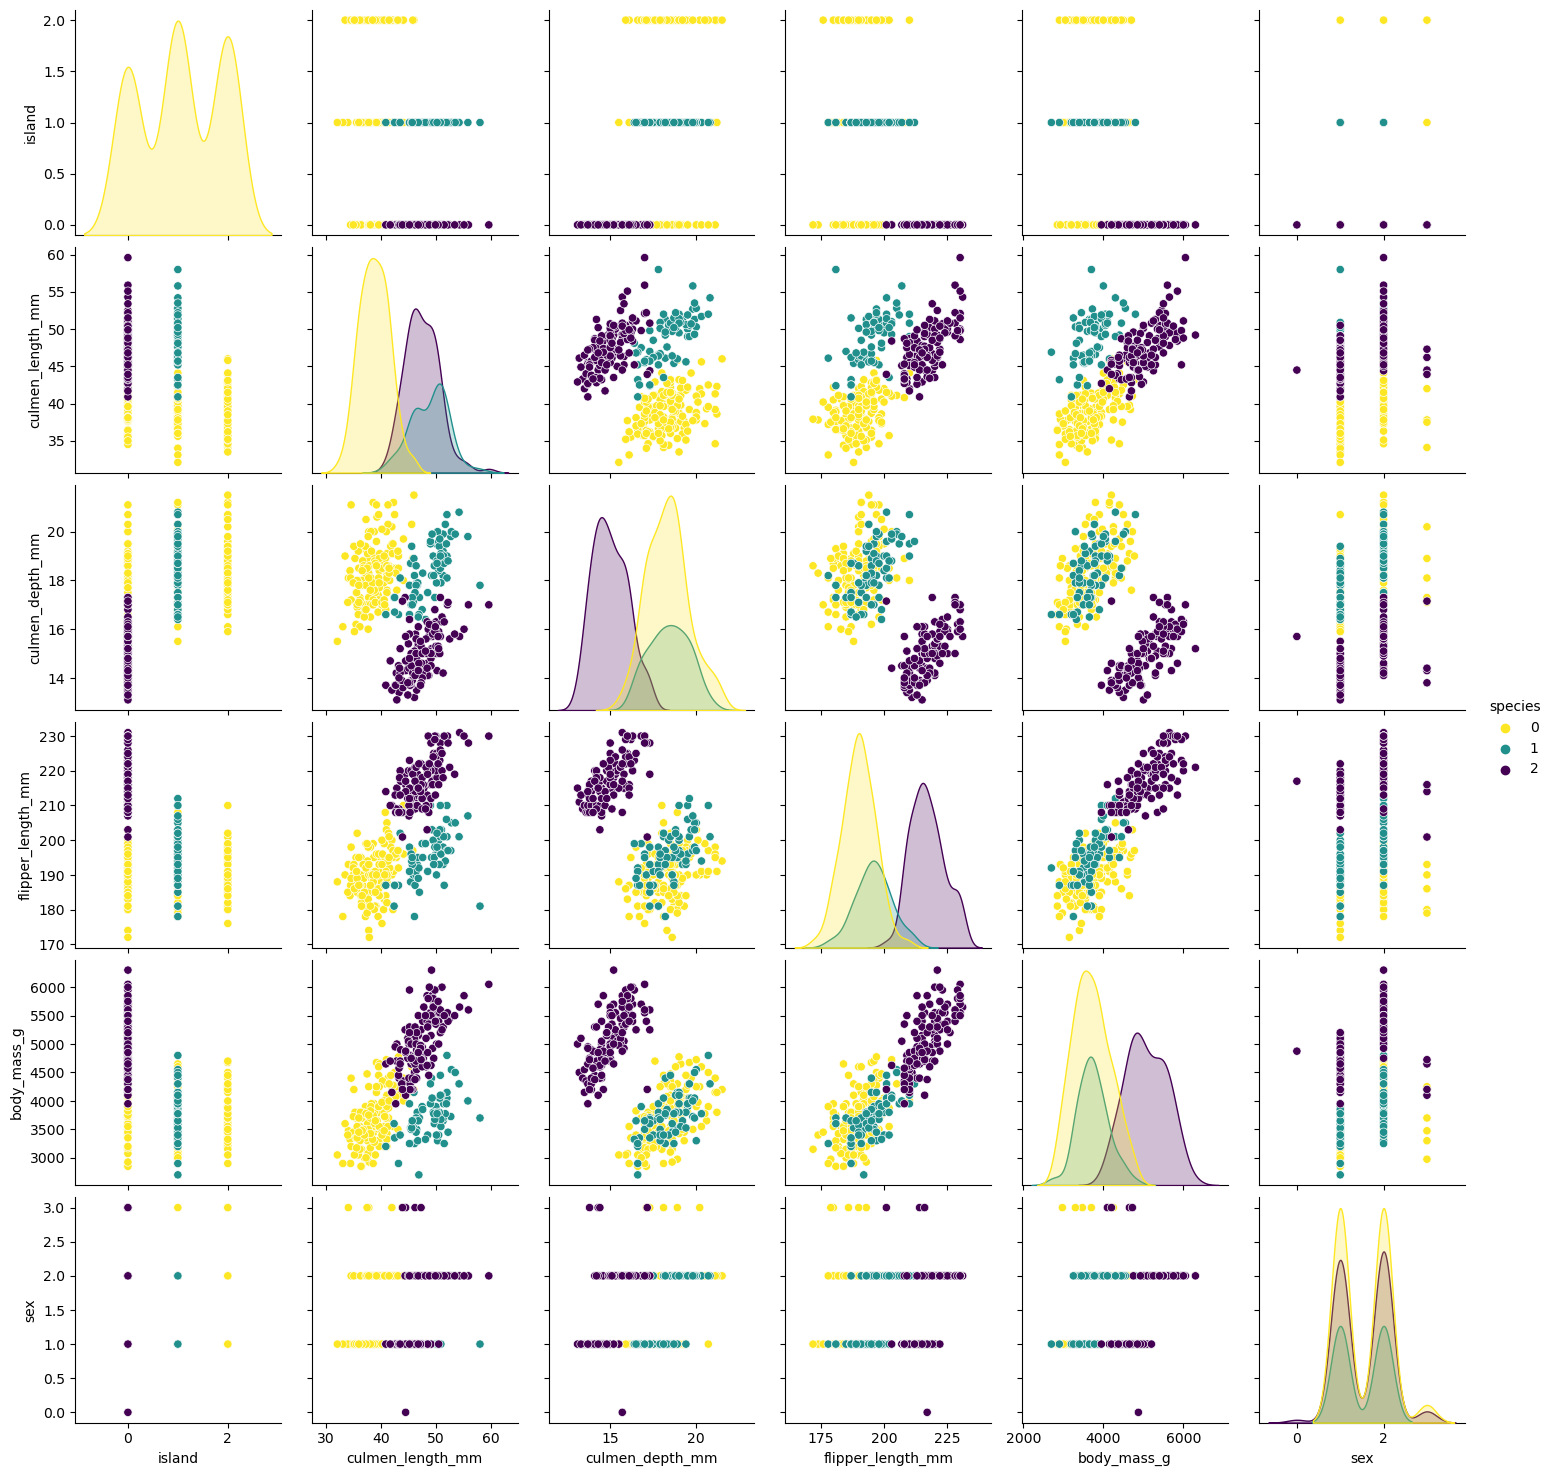

In [15]:
sns.pairplot(a,hue='species',palette='viridis_r')

In [16]:
a.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728674,-0.741335,0.851160,0.747726,-0.010379
island,-0.635659,1.000000,-0.351461,0.567506,-0.562328,-0.558045,0.043476
culmen_length_mm,0.728674,-0.351461,1.000000,-0.235053,0.656181,0.595110,0.264024
culmen_depth_mm,-0.741335,0.567506,-0.235053,1.000000,-0.583851,-0.471916,0.316379
flipper_length_mm,0.851160,-0.562328,0.656181,-0.583851,1.000000,0.871202,0.193476
body_mass_g,0.747726,-0.558045,0.595110,-0.471916,0.871202,1.000000,0.340402
sex,-0.010379,0.043476,0.264024,0.316379,0.193476,0.340402,1.000000


<AxesSubplot:>

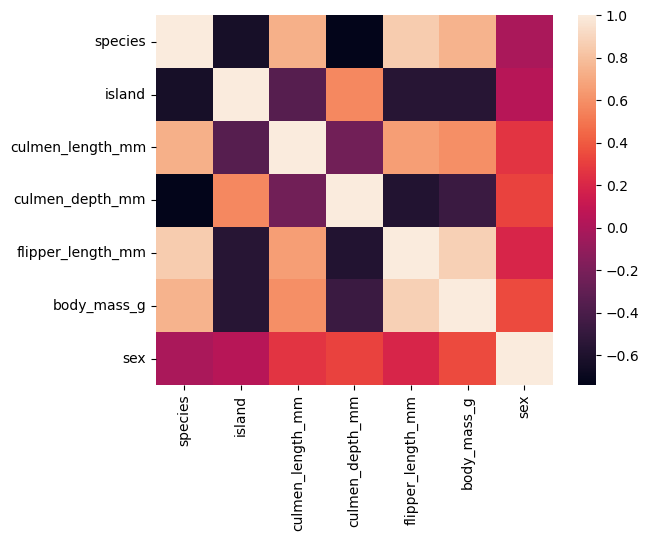

In [17]:
sns.heatmap(a.corr())

In [18]:
# splitting x(inputs) and y(outputs)

x=a.drop(['species'],axis=1)
y=a["species"]
x

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10000,18.70000,181.000000,3750.000000,2
1,2,39.50000,17.40000,186.000000,3800.000000,1
2,2,40.30000,18.00000,195.000000,3250.000000,1
3,2,43.92193,17.15117,200.915205,4201.754386,3
4,2,36.70000,19.30000,193.000000,3450.000000,1
...,...,...,...,...,...,...
339,0,43.92193,17.15117,200.915205,4201.754386,3
340,0,46.80000,14.30000,215.000000,4850.000000,1
341,0,50.40000,15.70000,222.000000,5750.000000,2
342,0,45.20000,14.80000,212.000000,5200.000000,1


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [20]:
# Implementing Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
31,1,37.2,18.1,178.0,3900.0,2
245,0,46.1,15.1,215.0,5100.0,2
277,0,45.5,15.0,220.0,5000.0,2
165,1,52.0,18.1,201.0,4050.0,2
250,0,47.3,15.3,222.0,5250.0,2
...,...,...,...,...,...,...
188,1,47.6,18.3,195.0,3850.0,1
71,2,39.7,18.4,190.0,3900.0,2
106,0,38.6,17.2,199.0,3750.0,1
270,0,46.6,14.2,210.0,4850.0,1


In [21]:
y_train

31     0
245    2
277    2
165    1
250    2
      ..
188    1
71     0
106    0
270    2
102    0
Name: species, Length: 240, dtype: int64

In [22]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
194,0.646897,49.542688,18.173905,196.309984,3550.803763,1.149464
157,0.646897,44.934612,17.545086,198.161391,3950.299834,1.954683
225,0.958423,45.985576,15.465147,209.269835,4549.543942,1.954683
208,0.646897,44.934612,16.964638,191.681466,3251.181709,1.954683
318,0.958423,47.521602,15.900483,202.789909,4624.449455,1.954683
...,...,...,...,...,...,...
79,0.335370,42.428465,18.173905,195.384280,4000.236843,1.149464
108,0.958423,39.194727,17.158121,182.424429,3176.276196,1.954683
18,0.335370,36.203519,17.835310,185.201540,3326.087223,1.954683
116,0.335370,39.598944,17.158121,188.904355,2901.622647,1.954683


In [23]:
# Here we implement 5 classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model2=GaussianNB()
model3=SVC()
model4=DecisionTreeClassifier(criterion='entropy')
model5=RandomForestClassifier(n_estimators=100)

modellist=[model1,model2,model3,model4,model5]

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))

the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[ 0  0 50]
 [ 0  0 20]
 [ 0  0 34]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
0.3269230769230769
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        20
           2       0.33      1.00      0.49        34

    accuracy                           0.33       104
   macro avg       0.11      0.33      0.16       104
weighted avg       0.11      0.33      0.16       104

the classification details of model GaussianNB() is below
the confusion matrix of  GaussianNB() is
[[50  0  0]
 [20  0  0]
 [34  0  0]]
accuracy score of GaussianNB() is
0.4807692307692308
the classification report of GaussianNB() is
              precision    recall  f1-score   support

    

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

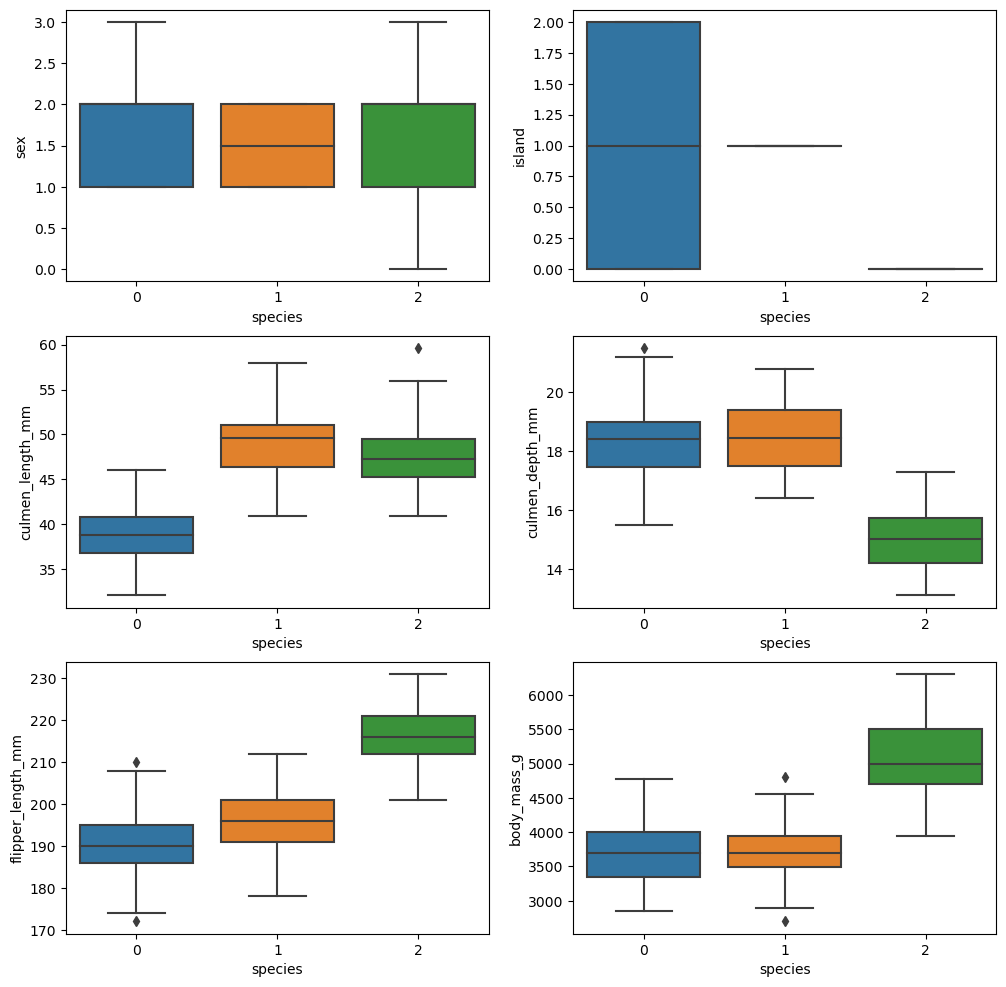

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

sns.boxplot(x=a["species"], y=a["sex"], ax=axs[0, 0])
sns.boxplot(x=a["species"], y=a["island"], ax=axs[0, 1])
sns.boxplot(x=a["species"], y=a["culmen_length_mm"], ax=axs[1, 0])
sns.boxplot(x=a["species"], y=a["culmen_depth_mm"], ax=axs[1, 1])
sns.boxplot(x=a["species"], y=a["flipper_length_mm"], ax=axs[2, 0])
sns.boxplot(x=a["species"], y=a["body_mass_g"], ax=axs[2, 1])
